In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [89]:
amazon_df = pd.read_csv(r"C:\Users\rupes\OneDrive\Documents\GitHub\lab-eda-univariate\data\amz_uk_price_prediction_dataset.csv")

In [91]:
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories
1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [92]:
crosstab_result = pd.crosstab(df['category'], amazon_df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


In [93]:
crosstab_result_proportion = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'], normalize='index')
print(max(crosstab_result_proportion[True]))

sorted_crosstab_result_proportion= crosstab_result_proportion.sort_values(by = True, ascending=False)
sorted_crosstab_result_proportion

0.05813467168548724


isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


<Axes: xlabel='category'>

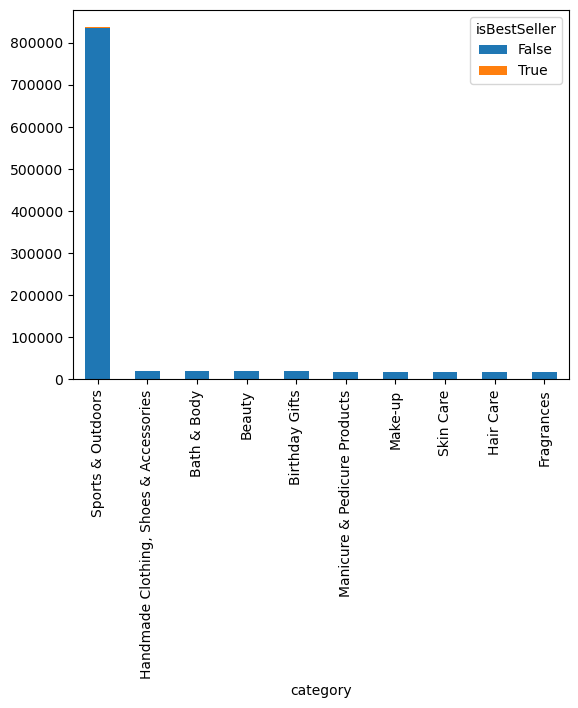

In [94]:
# Plotting a stacked bar chart for the 'crosstab_result' data

crosstab_result.sort_values(by = False, ascending=False).head(10).plot(kind="bar", stacked=True)

## 2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [95]:
# Chi-square test for 'isBestSeller" and 'category'# strong enough evidence btw this to item result show 0.0 lower than 0.5 relationships btwn thm ,
#null hypo test is thr no relation , we are proving that ther is releation btwn this 2 element by geting lower 0.5 result.

from scipy.stats import chi2_contingency


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [96]:
#Compute Cramér's V to understand the strength of association between best-seller status and category. weak relation ship because it's 0 to 1.

from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
#The Cramér's V value of 0.148 suggests a weak association between the two variables

In [ ]:
#**Visualizations**:
	# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [98]:
#Measures of Dispersion
df_price_standard_dev = amazon_df["price"].std()
print (f"Standart deviation for amazon uk price data = {df_price_standard_dev}" )

df_price_varyans = amazon_df["price"].var()
print (f"Varyans for amazon uk price data = {df_price_varyans}" )

df_price_range = amazon_df["price"].max() - amazon_df["price"].min()
print (f"range for amazon uk price data = {df_price_range}" )

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = amazon_df["price"][(amazon_df["price"] < lower_bound) | (amazon_df["price"] > upper_bound)]

print (Q1)
print (Q3)
print (IQR)


Standart deviation for amazon uk price data = 345.60886175352226
Varyans for amazon uk price data = 119445.48532256528
range for amazon uk price data = 100000.0
9.99
45.99
36.0


In [99]:
amazon_df = amazon_df.drop(amazon_df["price"][(amazon_df["price"] < lower_bound) | (amazon_df["price"] > upper_bound)].index)

In [100]:
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [52]:
bins = [0, 10, 20, 40,200, df['price'].max()]
df['price_quantile'] = pd.cut(df['price'], bins=bins, include_lowest=True)  

df.price_quantile.value_counts()

price_quantile
(10.0, 20.0]         650324
(-0.001, 10.0]       633419
(20.0, 40.0]         488695
(40.0, 200.0]        477197
(200.0, 100000.0]    194016
Name: count, dtype: int64

In [58]:
df['price_quantile']

0           (20.0, 40.0]
1           (20.0, 40.0]
2           (20.0, 40.0]
3           (20.0, 40.0]
4           (10.0, 20.0]
               ...      
2443646     (20.0, 40.0]
2443647    (40.0, 200.0]
2443648    (40.0, 200.0]
2443649    (40.0, 200.0]
2443650    (40.0, 200.0]
Name: price_quantile, Length: 2443651, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 40.0] < (40.0, 200.0] < (200.0, 100000.0]]

<Axes: xlabel='price_quantile'>

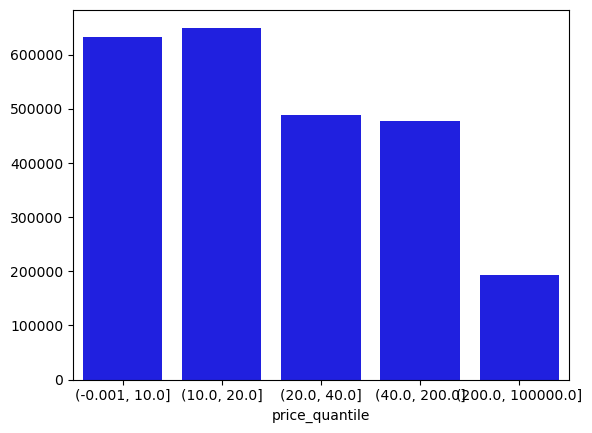

In [63]:
sns.barplot(x = df['price_quantile'].value_counts().index, y = df['price_quantile'].value_counts().values, color="blue") 

([0, 1, 2, 3, 4],
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 40.0]'),
  Text(3, 0, '(40.0, 200.0]'),
  Text(4, 0, '(200.0, 100000.0]')])

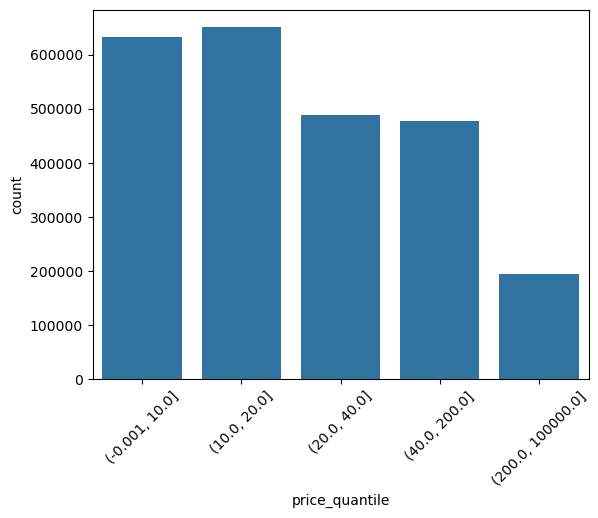

In [61]:
sns.countplot(x= df["price_quantile"])
plt.xticks(rotation = 45)

In [ ]:
###**Violin Plots**:
    #- Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
   # - Which product category tends to have the highest median price? Don't filter here by top categories.


In [101]:
amazon_df_top_20_categories = amazon_df[amazon_df['category'].isin(
                                        amazon_df['category'].value_counts().sort_values(ascending=False).head(20).index.to_list()
                                                                    )]

amazon_df_top_20_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [102]:
amazon_df_top_20_categories['category'].value_counts()

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

C:\Users\rupes\AppData\Local\Temp\ipykernel_21988\1840239832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=amazon_df_top_20_categories, x='category', y='price', palette="coolwarm", width=1.1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

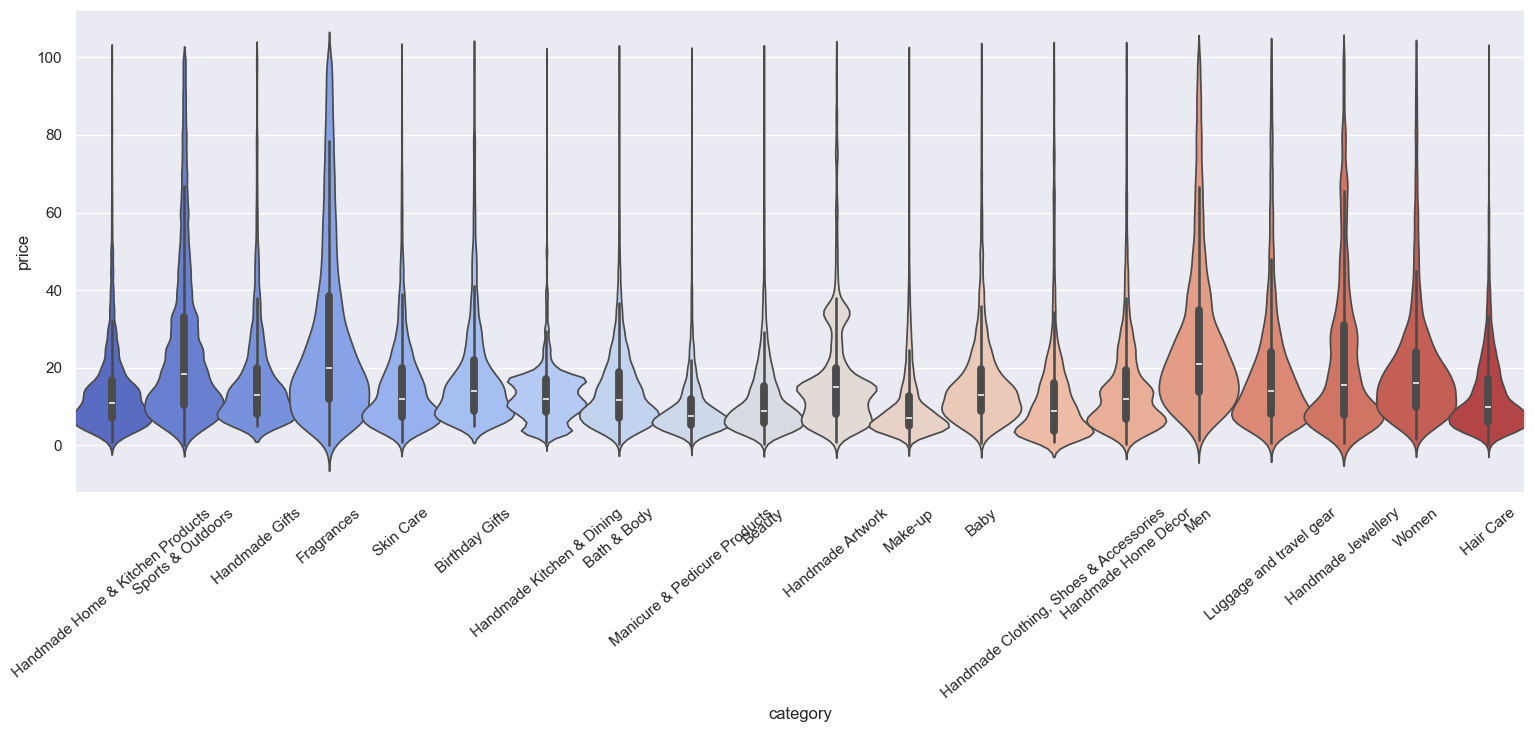

In [103]:
#sns.violinplot(df=top_10_df, x= df["price_quantile"], y='category', palette="coolwarm")


sns.set_theme(rc={'figure.figsize':(18.7,6.27)})

sns.violinplot(data=amazon_df_top_20_categories, x='category', y='price', palette="coolwarm", width=1.1)
plt.xticks(rotation = 40)

Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [107]:
top_10_categories_mean_price = amazon_df.groupby('category')['price'].mean().head(10).reset_index()
top_10_categories_mean_price 

,category,price
0,3D Printers,55.739722
1,3D Printing & Scanning,35.623904
2,Abrasive & Finishing Products,14.427611
3,Action Cameras,38.936875
4,Adapters,8.750197
5,Agricultural Equipment & Supplies,18.819428
6,Alexa Built-In Devices,53.927692
7,Art & Craft Supplies,14.583230
8,Arts & Crafts,8.006540
9,Baby,16.389799


<Axes: xlabel='price', ylabel='category'>

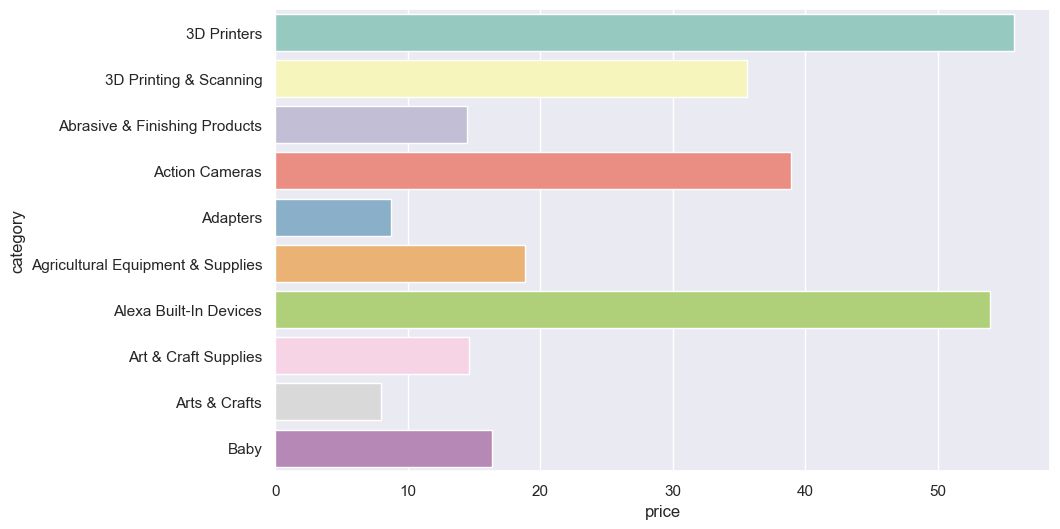

In [110]:
#plt.figure(figsize=(20, 10)) #Plot size
#sns.barplot(y=top_10_categories_mean_price['category'], x=top_10_categories_mean_price["price"], palette="Set3");
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_categories_mean_price['category'], x=top_10_categories_mean_price['price'], palette="Set3", hue=top_10_categories_mean_price['category'], dodge=False, legend=False)

### **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [113]:
amazon_df_top_10_categories = amazon_df[amazon_df['category'].isin(
                                        amazon_df['category'].value_counts().sort_values(ascending=False).head(10).index.to_list()
                                                                    )]

amazon_df_top_10_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [112]:
amazon_df_top_10_categories['category'].value_counts()

category
Sports & Outdoors                                   688109
Beauty                                               19041
Handmade Clothing, Shoes & Accessories               18695
Bath & Body                                          18596
Birthday Gifts                                       18245
Skin Care                                            18237
Hair Care                                            18212
Manicure & Pedicure Products                         18163
Make-up                                              17908
Handmade Gifts                                       17731
Handmade Home Décor                                  17456
Luggage and travel gear                              17324
Handmade Kitchen & Dining                            17281
Handmade Artwork                                     17196
Women                                                17058
Handmade Home & Kitchen Products                     16903
Handmade Jewellery                             

In [114]:
amazon_df_top_10_categories = amazon_df_top_10_categories.loc[amazon_df_top_10_categories['stars'] != 0]

C:\Users\rupes\AppData\Local\Temp\ipykernel_21988\1159161754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=amazon_df_top_10_categories, x='category', y='stars', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

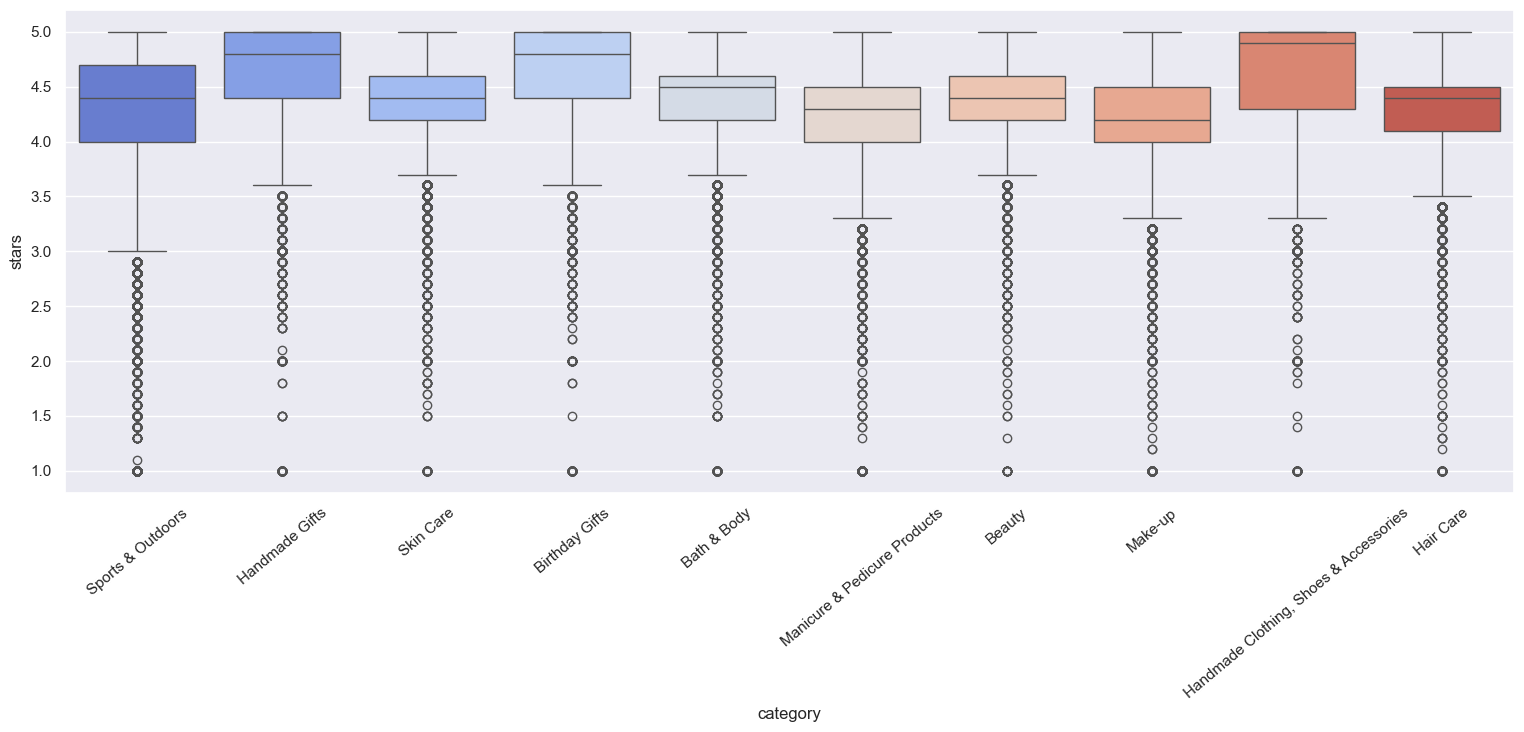

In [117]:
sns.boxplot(data=amazon_df_top_10_categories, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation = 40)

### Part 3: Investigating the Interplay Between Product Prices and Ratings
1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
  
    - 2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


In [121]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = amazon_df['price'].corr(amazon_df['stars'])
correlation



-0.0776729987818137

In [ ]:
##Since the correlation is weak, it suggests that the "stars" (ratings) and "price" do not have a meaningful linear relationship. Changes in price are not strongly associated with changes in ratings.


In [123]:
## Calculating the Spearman rank correlation between 'price' and 'stars' columns
correlation = amazon_df['price'].corr(amazon_df['stars'], method='spearman')
correlation

-0.06679697280768314

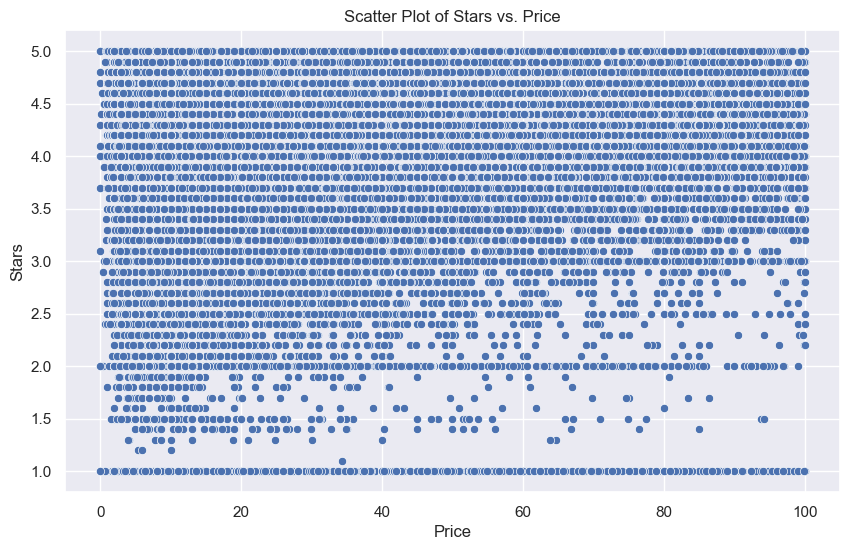

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=amazon_df_top_10_categories)

# Add title and labels
plt.title('Scatter Plot of Stars vs. Price')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.grid(True)
plt.show()

In [140]:
numeric_df = amazon_df.select_dtypes(include='number')

In [141]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = numeric_df.corrwith(amazon_df['price'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

price                1.000000
uid                 -0.003152
stars               -0.066797
reviews             -0.078127
boughtInLastMonth   -0.167260
dtype: float64

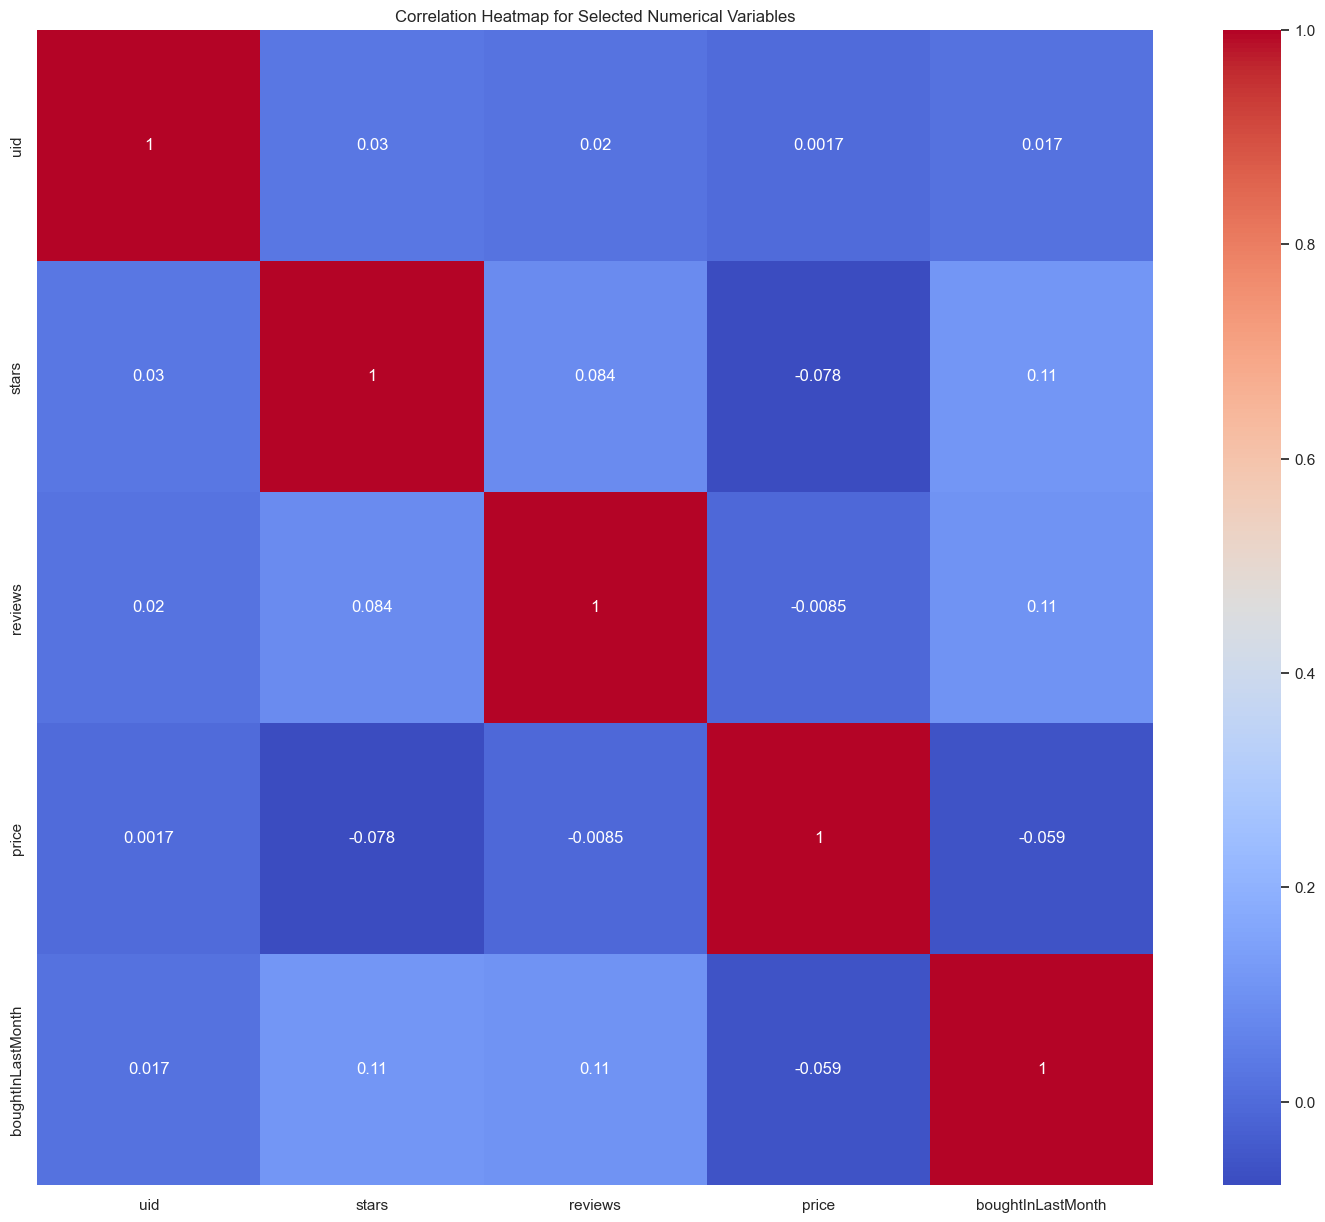

In [143]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

correlation_matrix = numeric_df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

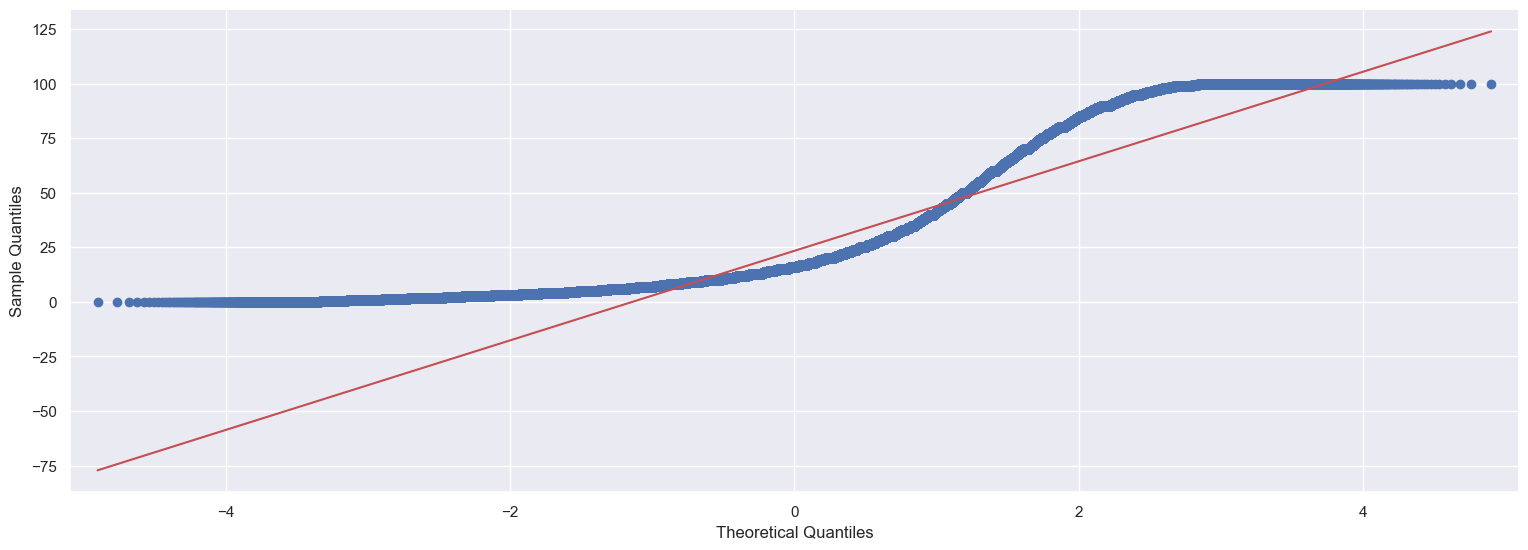

In [139]:
# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
import statsmodels.api as sm
sm.qqplot(amazon_df['price'], line='s');